In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from linearmodels.panel import PooledOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import BetweenOLS
from linearmodels.panel import FirstDifferenceOLS

In [3]:
#Reading the 'Population' spreadsheet
xls = pd.ExcelFile('/Users/poojadeshpande91/Desktop/Projects/paneldata/Data/brazilian_data.xls')
df = pd.read_excel(xls,'Population')

In [4]:
#Display first 5 rows
df.head()

,Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,CityUF,2013,2014,2015,2016
0,110001,0,4518,7321,10134,12939,15735,18505,21235,23908,...,24577,24354,24392,24228,24069,"Alta Floresta D'Oeste, RO",25728,25652,25578,25506
1,110002,53365,29402,34942,40502,46046,51573,57048,62445,67729,...,84581,85542,90353,91570,92747,"Ariquemes, RO",101269,102860,104401,105896
2,110003,0,3654,4115,4578,5040,5500,5956,6405,6845,...,6777,6691,6313,6221,6132,"Cabixi, RO",6495,6424,6355,6289
3,110004,67030,48283,51411,54550,57681,60802,63893,66941,69925,...,78263,78675,78574,78959,79330,"Cacoal, RO",85863,86556,87226,87877
4,110005,0,5860,7467,9080,10689,12292,13880,15446,16979,...,16784,16627,17029,16939,16852,"Cerejeiras, RO",18041,18013,17986,17959


## EDA

In [5]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df.describe()

,Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,...,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000
mean,325358.628,21233.753,21751.196,22221.585,22693.600,23164.376,23633.622,24098.473,24556.686,25005.411,...,33991.955,34041.798,34377.207,34247.002,34538.472,34825.230,36097.449,36409.249,36711.393,37004.321
std,98491.034,146812.120,148243.375,150315.270,152407.033,154505.303,156608.686,158703.242,160778.478,162820.199,...,201046.164,200356.569,201715.058,203024.018,204379.968,205692.359,212657.593,214146.833,215597.480,217013.308
min,110001.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,825.000,822.000,818.000,815.000
25%,251212.500,0.000,3057.750,3117.500,3179.000,3211.750,3246.250,3274.250,3269.250,3267.750,...,5062.250,5301.750,5334.500,5224.000,5236.500,5244.250,5401.750,5427.750,5455.000,5482.750
50%,314627.500,7353.500,8470.500,8609.500,8781.000,8904.000,9000.500,9073.500,9169.000,9283.000,...,10729.500,11107.000,11190.500,10931.500,11008.000,11024.500,11388.500,11448.000,11514.000,11584.000
75%,411918.750,17709.000,17613.000,17852.500,18061.750,18359.250,18688.000,18894.000,19082.500,19293.000,...,22945.250,23103.000,23234.250,23409.000,23640.250,23713.250,24607.750,24765.750,24974.750,25098.500
max,530010.000,8493217.000,8582358.000,8690950.000,8799908.000,8908559.000,9016877.000,9124164.000,9229936.000,9333514.000,...,11104715.000,10990249.000,11037590.000,11253503.000,11316119.000,11376685.000,11821873.000,11895893.000,11967825.000,12038175.000


In [7]:
df.shape

(5570, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 39 columns):
Code      5570 non-null int64
1980      5570 non-null int64
1981      5570 non-null int64
1982      5570 non-null int64
1983      5570 non-null int64
1984      5570 non-null int64
1985      5570 non-null int64
1986      5570 non-null int64
1987      5570 non-null int64
1988      5570 non-null int64
1989      5570 non-null int64
1990      5570 non-null int64
1991      5570 non-null int64
1992      5570 non-null int64
1993      5570 non-null int64
1994      5570 non-null int64
1995      5570 non-null int64
1996      5570 non-null int64
1997      5570 non-null int64
1998      5570 non-null int64
1999      5570 non-null int64
2000      5570 non-null int64
2001      5570 non-null int64
2002      5570 non-null int64
2003      5570 non-null int64
2004      5570 non-null int64
2005      5570 non-null int64
2006      5570 non-null int64
2007      5570 non-null int64
2008      5570 non-null

In [9]:
#Which city has the highest population
#Which year has the highest population
#For each city which year had the highest population

In [10]:
#Alter the order of the columns
df= df[['Code','CityUF',1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]]

In [11]:
plt.rcParams['figure.figsize']=25,15

In [12]:
sns.set_context('talk')

In [13]:
sns.set_style('whitegrid')

In [14]:
#Plot change in the mean population over 34 years
df_mean = df.iloc[:,1:].mean(axis = 0)

In [15]:
df_mean_pop = pd.DataFrame({'Year':df_mean.index[1:],'Mean pop': df_mean[1:]})
df_mean_pop.reset_index(drop=True,inplace = True)

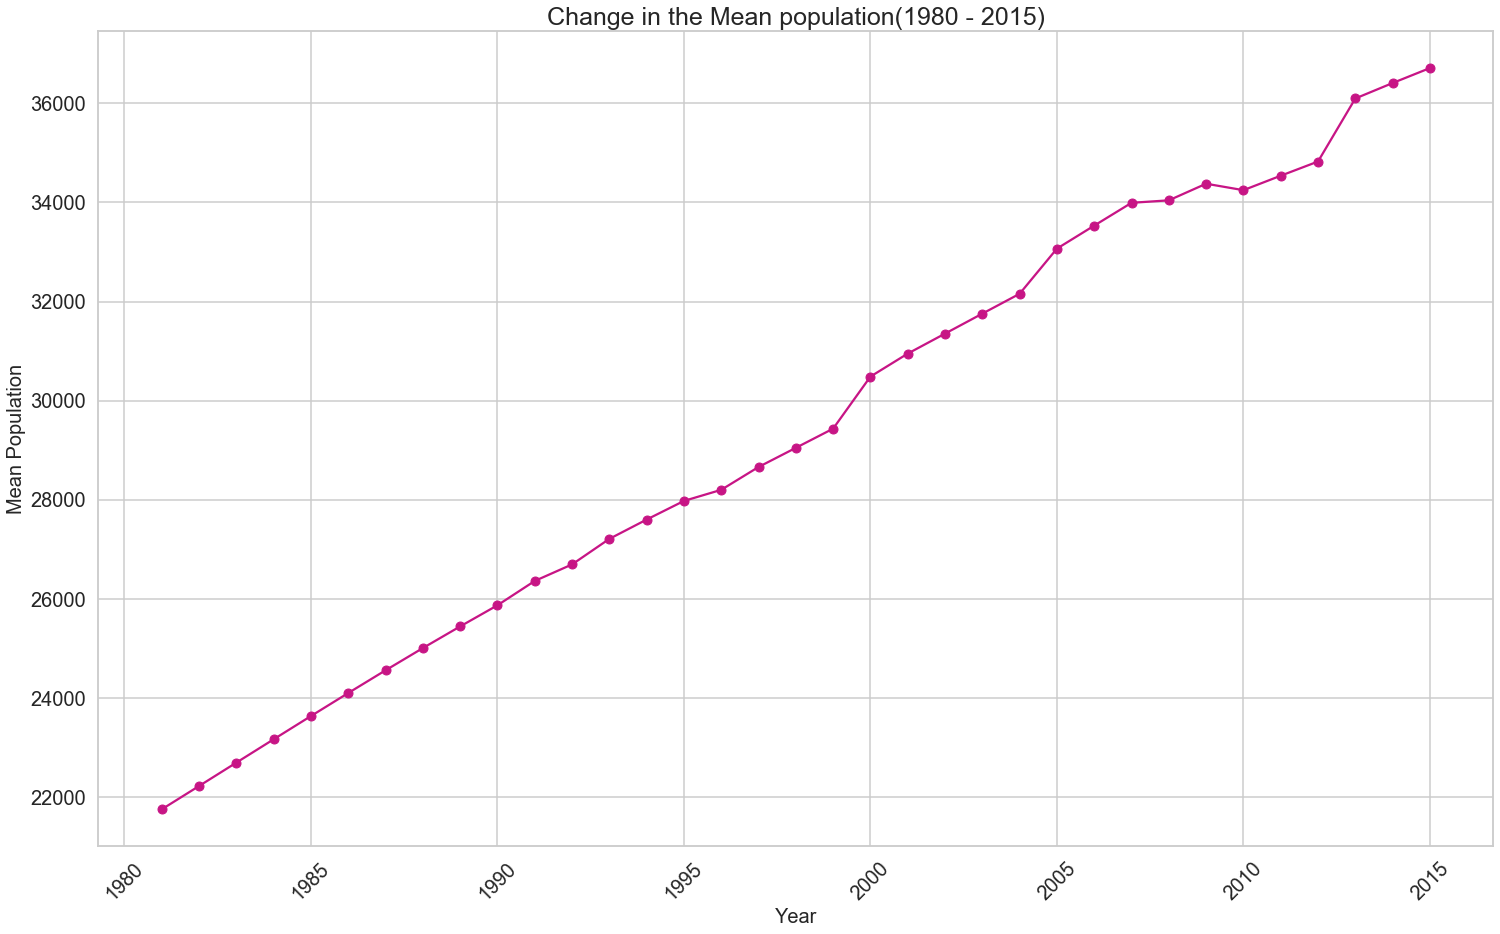

In [16]:
plt.plot('Year','Mean pop',data=df_mean_pop, marker = 'o',color = 'mediumvioletred')
plt.title('Change in the Mean population(1980 - 2015)',fontsize = 25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Mean Population',fontsize = 20)
plt.show()

In [17]:
#Apply log transformation on population data
dflog = df.iloc[:,2:].apply(np.log1p)

In [18]:
dflog.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.000,8.416,8.899,9.224,9.468,9.664,9.826,9.963,10.082,10.185,...,10.275,10.288,10.110,10.100,10.102,10.095,10.089,10.155,10.152,10.150
1,10.885,10.289,10.461,10.609,10.737,10.851,10.952,11.042,11.123,11.197,...,11.373,11.394,11.345,11.357,11.411,11.425,11.438,11.526,11.541,11.556
2,0.000,8.204,8.323,8.429,8.525,8.613,8.692,8.765,8.831,8.892,...,8.912,8.911,8.821,8.809,8.751,8.736,8.721,8.779,8.768,8.757
3,11.113,10.785,10.848,10.907,10.963,11.015,11.065,11.112,11.155,11.196,...,11.244,11.250,11.268,11.273,11.272,11.277,11.281,11.361,11.369,11.376
4,0.000,8.676,8.918,9.114,9.277,9.417,9.538,9.645,9.740,9.824,...,9.754,9.745,9.728,9.719,9.743,9.737,9.732,9.800,9.799,9.797


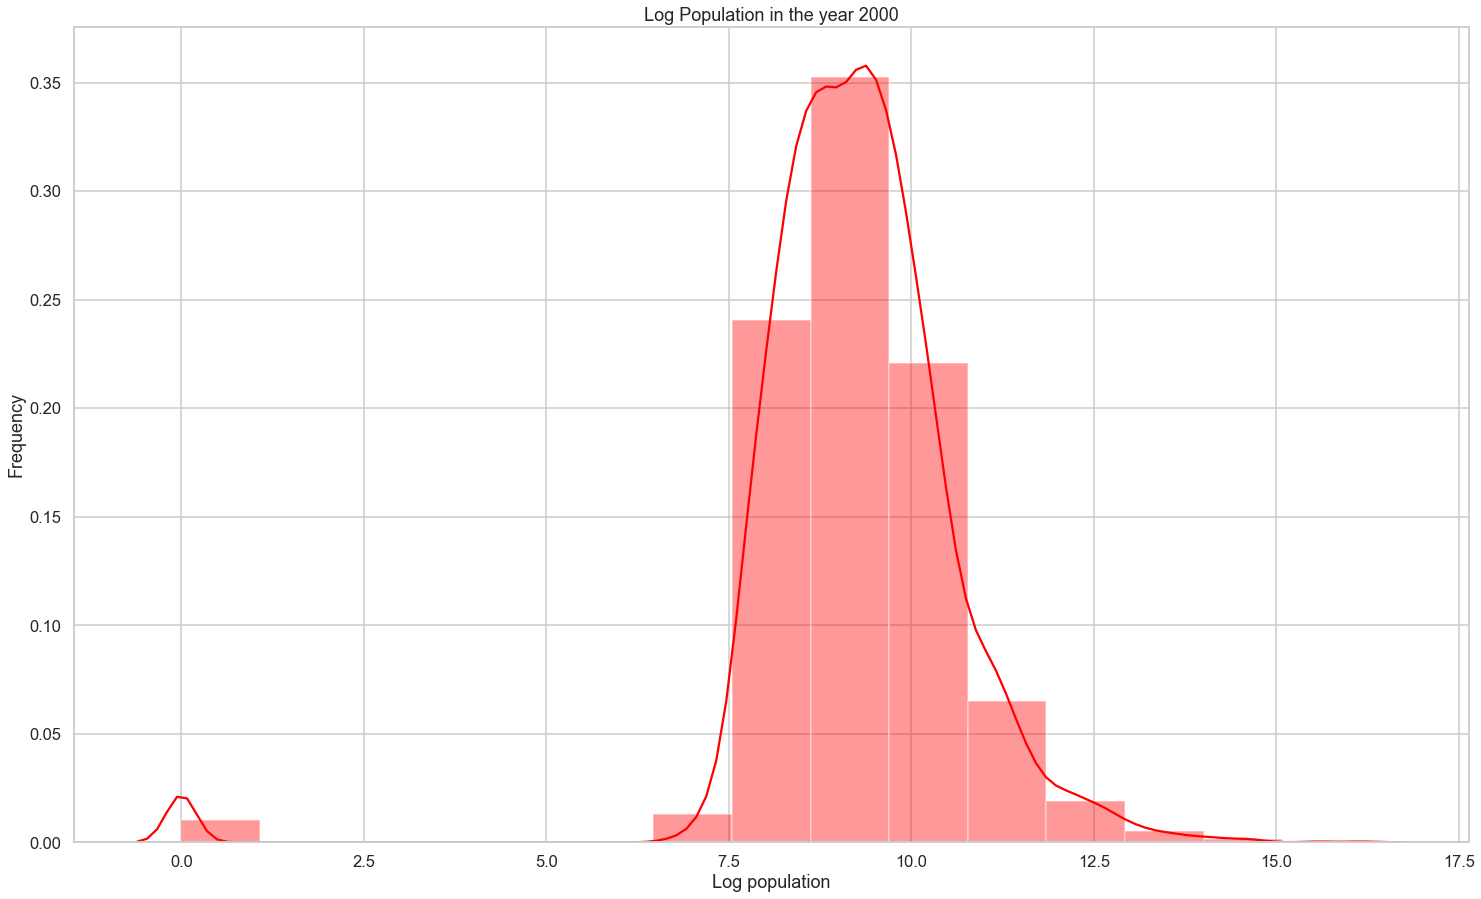

In [19]:
#Distribution of log population
sns.distplot(dflog[2000],color='r',bins = 15)
plt.title("Log Population in the year 2000")
plt.xlabel("Log population")
plt.ylabel("Frequency")
plt.show()

In [20]:
#Read the second dataset(homicide data)
df2 = pd.read_excel(xls,'Homicides')

In [21]:
df2.head()

,Code,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,CityUF
0,110001,0,0,0,0,0,0,0,0,0,...,6,6,2,11,4,7,3,7,4,"Alta Floresta D'Oeste, RO"
1,110002,24,35,19,20,27,36,36,49,51,...,48,54,50,72,82,43,57,75,63,"Ariquemes, RO"
2,110003,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,"Cabixi, RO"
3,110004,17,9,29,12,6,11,5,10,7,...,19,27,13,21,16,20,13,14,15,"Cacoal, RO"
4,110005,0,0,0,0,0,0,4,2,6,...,8,3,4,3,2,9,3,6,3,"Cerejeiras, RO"


In [22]:
df2.describe()

,Code,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,...,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000
mean,325358.628,1.889,2.335,2.578,2.653,2.965,3.327,3.313,3.444,3.868,...,8.449,8.357,8.647,8.388,8.798,9.035,9.193,9.190,9.909,10.005
std,98491.034,22.915,30.697,29.926,28.993,37.787,46.562,45.817,45.928,53.433,...,75.244,63.419,63.530,56.699,56.155,56.406,56.865,54.031,58.745,58.890
min,110001.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,251212.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,314627.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
75%,411918.750,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,3.000,3.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,5.000
max,530010.000,1240.000,1594.000,1764.000,1747.000,2633.000,3264.000,3203.000,3218.000,3584.000,...,3955.000,2822.000,2538.000,1935.000,1720.000,1837.000,1854.000,1613.000,1814.000,2129.000


In [23]:
df2= df2[['Code','CityUF',1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]]

In [24]:
df2.head()

,Code,CityUF,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,110001,"Alta Floresta D'Oeste, RO",0,0,0,0,0,0,0,0,...,5,6,6,2,11,4,7,3,7,4
1,110002,"Ariquemes, RO",35,19,20,27,36,36,49,51,...,50,48,54,50,72,82,43,57,75,63
2,110003,"Cabixi, RO",0,0,0,0,0,0,0,0,...,2,0,0,2,1,1,0,0,0,0
3,110004,"Cacoal, RO",9,29,12,6,11,5,10,7,...,16,19,27,13,21,16,20,13,14,15
4,110005,"Cerejeiras, RO",0,0,0,0,0,4,2,6,...,2,8,3,4,3,2,9,3,6,3


In [25]:
#Apply log transformation on Homicide data
df2log = df2.iloc[:,2:].apply(np.log1p)

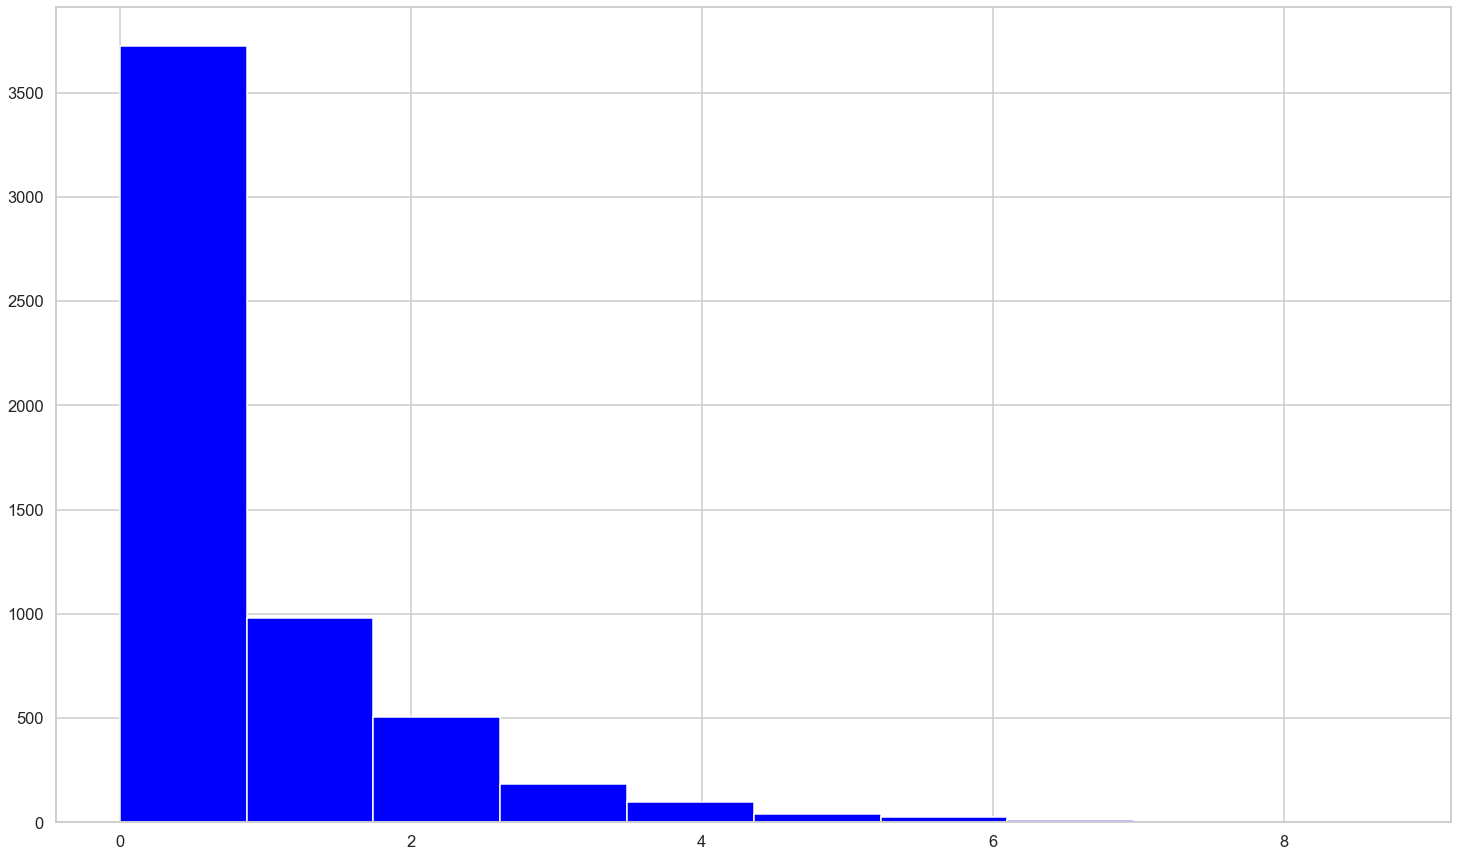

In [26]:
#Distribution of log homicides
plt.hist(df2log[2000],color='b')
plt.ticklabel_format(style = 'plain')
plt.show()

In [27]:
df2log.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.099,1.946,...,1.792,1.946,1.946,1.099,2.485,1.609,2.079,1.386,2.079,1.609
1,3.584,2.996,3.045,3.332,3.611,3.611,3.912,3.951,4.094,4.159,...,3.932,3.892,4.007,3.932,4.290,4.419,3.784,4.060,4.331,4.159
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.099,...,1.099,0.000,0.000,1.099,0.693,0.693,0.000,0.000,0.000,0.000
3,2.303,3.401,2.565,1.946,2.485,1.792,2.398,2.079,2.890,2.890,...,2.833,2.996,3.332,2.639,3.091,2.833,3.045,2.639,2.708,2.773
4,0.000,0.000,0.000,0.000,0.000,1.609,1.099,1.946,1.609,1.946,...,1.099,2.197,1.386,1.609,1.386,1.099,2.303,1.386,1.946,1.386


## Model

In [28]:
df.head()

,Code,CityUF,1980,1981,1982,1983,1984,1985,1986,1987,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,110001,"Alta Floresta D'Oeste, RO",0,4518,7321,10134,12939,15735,18505,21235,...,29007,29380,24577,24354,24392,24228,24069,25728,25652,25578
1,110002,"Ariquemes, RO",53365,29402,34942,40502,46046,51573,57048,62445,...,86925,88803,84581,85542,90353,91570,92747,101269,102860,104401
2,110003,"Cabixi, RO",0,3654,4115,4578,5040,5500,5956,6405,...,7421,7413,6777,6691,6313,6221,6132,6495,6424,6355
3,110004,"Cacoal, RO",67030,48283,51411,54550,57681,60802,63893,66941,...,76421,76855,78263,78675,78574,78959,79330,85863,86556,87226
4,110005,"Cerejeiras, RO",0,5860,7467,9080,10689,12292,13880,15446,...,17218,17066,16784,16627,17029,16939,16852,18041,18013,17986


In [29]:
df2.head()

,Code,CityUF,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,110001,"Alta Floresta D'Oeste, RO",0,0,0,0,0,0,0,0,...,5,6,6,2,11,4,7,3,7,4
1,110002,"Ariquemes, RO",35,19,20,27,36,36,49,51,...,50,48,54,50,72,82,43,57,75,63
2,110003,"Cabixi, RO",0,0,0,0,0,0,0,0,...,2,0,0,2,1,1,0,0,0,0
3,110004,"Cacoal, RO",9,29,12,6,11,5,10,7,...,16,19,27,13,21,16,20,13,14,15
4,110005,"Cerejeiras, RO",0,0,0,0,0,4,2,6,...,2,8,3,4,3,2,9,3,6,3


In [30]:
#Set City as Index for Population data
df.set_index(['CityUF'],inplace=True)

In [31]:
#Stack the columns to index
dfalt = df.iloc[:,1:-2].stack()

In [32]:
#Convert the series to a dataframe
dfalt = pd.DataFrame(dfalt)

In [33]:
#Rename the columns
dfalt.rename(columns = {0:'Population'},inplace = True)

In [34]:
#Set city as index for Homicide data
df2.set_index(['CityUF'],inplace = True)

In [35]:
#Stack the columns to index
df2alt = df2.iloc[:,1:].stack()

In [36]:
#Convert the series to a dataframe
df2alt = pd.DataFrame(df2alt)

In [37]:
#Rename the columns
df2alt.rename(columns = {0:'Homicides'},inplace = True)

In [38]:
#Merge both the dataframes 
final_df = dfalt.merge(df2alt,how = 'inner',left_index = True,on = dfalt.index,copy = True)

In [39]:
#Drop the key_0 column
final_df.drop(columns = 'key_0',inplace = True)


In [40]:
display(final_df.head(10))

Population  Homicides
CityUF                                               
Alta Floresta D'Oeste, RO 1980           0          0
                          1981        4518          0
                          1982        7321          0
                          1983       10134          0
                          1984       12939          0
                          1985       15735          0
                          1986       18505          0
                          1987       21235          0
                          1988       23908          2
                          1989       26513          6

In [41]:
#Apply log transformation on the final dataframe
final_df_log = final_df[['Population','Homicides']].apply(np.log1p)

In [42]:
#View the final dataframe

final_df_log.reset_index(inplace = True)

In [43]:
final_df_log.rename(columns = {'level_1':'year'},inplace = True)

In [44]:
data=final_df_log.set_index(['CityUF','year'])

In [45]:
data.to_csv('brazil_data.csv')

# Models for data where log population > 5

In [55]:
data = data[data.Population > 5]

In [119]:
display(data.head())

Population  Homicides
CityUF                    year                       
Alta Floresta D'Oeste, RO 1981       8.416      0.000
                          1982       8.899      0.000
                          1983       9.224      0.000
                          1984       9.468      0.000
                          1985       9.664      0.000

In [57]:
#Add a constant to the exogenous variable, Population
exog_var=['Population']
var = sm.add_constant(data[exog_var])

/Users/poojadeshpande91/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
mod = PanelOLS(data.Homicides, var)
res = mod.fit()


In [59]:
mod = PanelOLS(data.Homicides, var,entity_effects=True)
res_entityeffects = mod.fit()

In [60]:
mod = PanelOLS(data.Homicides, var,time_effects=True)
res_timeeffects = mod.fit()


In [61]:
mod = PanelOLS(data.Homicides, var,entity_effects=True,time_effects=True)
res_fixedeffects = mod.fit()

In [62]:
mod = PanelOLS(data.Homicides, var)
res_clustered = mod.fit(cov_type='clustered', cluster_entity=True)

In [63]:
mod = PanelOLS(data.Homicides, var)
res_robust = mod.fit(cov_type='robust')

In [64]:
mod = PooledOLS(data.Homicides, var)
pooled_res = mod.fit()

In [65]:
mod = RandomEffects(data.Homicides, var)
re_res = mod.fit()

In [66]:
mod = BetweenOLS(data.Homicides, var)
be_res = mod.fit()

In [67]:
df1 = data.loc[~data.index.duplicated(keep='first')]
mod = FirstDifferenceOLS(df1.Homicides,df1[exog_var])
fd_res = mod.fit()

In [68]:
from linearmodels import panel

In [109]:
print(panel.compare({'1-pooled':res,
                     '2-time':res_timeeffects,
                     '3-entity ':res_entityeffects ,
                     '4-time_entity':res_fixedeffects,
                     '5-between':be_res,
                     '6-random':re_res,
                     '7-firstd': fd_res,
                     '8-clustered':res_clustered,
                     '9-robust' : res_robust},precision='pvalues'))

                                                                            Model Comparison                                                                           
                              1-pooled         2-time      3-entity   4-time_entity      5-between          6-random               7-firstd   8-clustered      9-robust
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dep. Variable                Homicides      Homicides      Homicides      Homicides      Homicides         Homicides              Homicides     Homicides     Homicides
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS     BetweenOLS     RandomEffects     FirstDifferenceOLS      PanelOLS      PanelOLS
No. Observations                172565         172565         172565         172565           5569            172565                 166992        172565       

# Models for the complete dataset

In [90]:
all_data = final_df_log.set_index(['CityUF','year'])

In [91]:
exog_vars = 'Population'
var = sm.add_constant(all_data[exog_vars])

In [93]:
model = PanelOLS(all_data.Homicides,var)
result = model.fit()

In [95]:
model = PanelOLS(all_data.Homicides,var,entity_effects = True)
result_entity = model.fit()

In [96]:
model = PanelOLS(all_data.Homicides,var,time_effects = True)
result_time = model.fit()

In [97]:
model = PanelOLS(all_data.Homicides,var,entity_effects = True,time_effects = True)
result_fixedeffects = model.fit()

In [98]:
model = PanelOLS(all_data.Homicides,var)
result_clustered = model.fit(cov_type = 'clustered',cluster_entity = True)

In [99]:
model = PanelOLS(all_data.Homicides,var,)
result_robust = model.fit(cov_type = 'robust')

In [100]:
model = PooledOLS(all_data.Homicides,var)
result_pooled = model.fit()

In [102]:
model = RandomEffects(all_data.Homicides,var)
result_random = model.fit()

In [103]:
model = BetweenOLS(all_data.Homicides,var)
result_between = model.fit()

In [104]:
df2 = all_data.loc[~all_data.index.duplicated(keep='first')]
model = FirstDifferenceOLS(df2.Homicides,df2[exog_vars])
fd_result = model.fit()

In [108]:
print(panel.compare({'1-pooled':result,
                     '2-entity':result_entity,
                      '3-time':result_time,
                      '4-time_entity':result_fixedeffects,
                      '5-clustered':result_clustered,
                      '6-random':result_random,
                      '7-between':result_between,
                      '8-firstd':fd_result,
                      '9-robust':result_robust},
                       precision = 'pvalues'))

                                                                            Model Comparison                                                                           
                              1-pooled       2-entity         3-time  4-time_entity   5-clustered          6-random      7-between               8-firstd      9-robust
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dep. Variable                Homicides      Homicides      Homicides      Homicides     Homicides         Homicides      Homicides              Homicides     Homicides
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS      PanelOLS     RandomEffects     BetweenOLS     FirstDifferenceOLS      PanelOLS
No. Observations                189448         189448         189448         189448        189448            189448           5569                 183777       

# Partial data vs Complete data model comparison

In [117]:
#Compare two sets of models
coef_mod1 = [res.params[1],res_entityeffects.params[1],res_timeeffects.params[1],res_fixedeffects.params[1],
             be_res.params[1],re_res.params[1],fd_res.params[0]]
coef_mod2 = [result.params[1],result_entity.params[1],result_time.params[1],result_fixedeffects.params[1],
             result_between.params[1],result_random.params[1],fd_result.params[0]]
r2_mod1 = [res.rsquared,res_entityeffects.rsquared,res_timeeffects.rsquared,res_fixedeffects.rsquared,
             be_res.rsquared,re_res.rsquared,fd_res.rsquared]
r2_mod2 = [result.rsquared,result_entity.rsquared,result_time.rsquared,result_fixedeffects.rsquared,
             result_between.rsquared,result_random.rsquared,fd_result.rsquared]
compare_table = pd.DataFrame({'coeff_partialdata':coef_mod1,
                              'coeff_alldata':coef_mod2,
                              'r2_partialdata':r2_mod1,
                              'r2_alldata':r2_mod2},
                               index = ['Pooled','EntityEffects','TimeEffects','Time_Entity','BetweenOLS','Random','FirstDifference'])
display(compare_table)

,coeff_partialdata,coeff_alldata,r2_partialdata,r2_alldata
Pooled,0.740,0.176,0.576,0.231
EntityEffects,1.051,0.065,0.125,0.053
TimeEffects,0.742,0.171,0.591,0.209
Time_Entity,0.762,0.027,0.066,0.008
BetweenOLS,0.712,0.264,0.729,0.396
Random,0.856,0.070,0.175,0.058
FirstDifference,0.980,0.011,0.023,0.000


# Figures

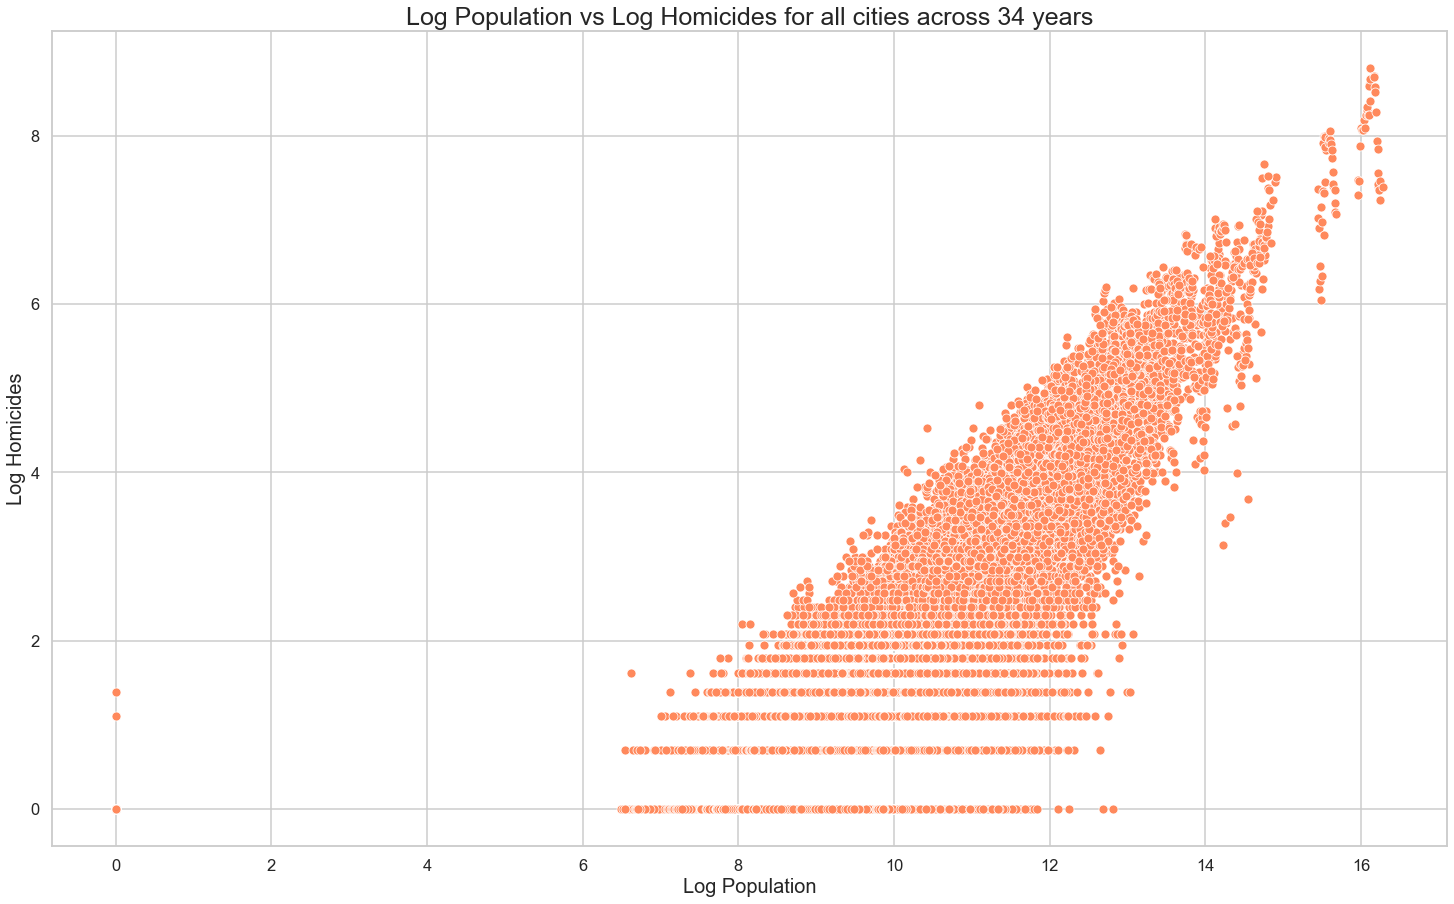

In [110]:
sns.scatterplot(x = 'Population', y = 'Homicides',data = all_data,color = '#FF895C')
plt.title('Log Population vs Log Homicides for all cities across 34 years',fontsize = 25)
plt.xlabel('Log Population',fontsize = 20)
plt.ylabel('Log Homicides',fontsize = 20)
plt.show()

In [71]:
#Plot model curves
size = len(data['Population'])

In [82]:
y_pooled = np.empty(size)
y_time = np.empty(size)
y_entity = np.empty(size)
y_fixed = np.empty(size)
y_between = np.empty(size)
y_random = np.empty(size)
y_firstd = np.empty(size)
y_clustered = np.empty(size)
y_robust = np.empty(size)

In [83]:

y_pooled = np.full(size,pooled_res.params[0])+(np.full(size,pooled_res.params[1])*data['Population'].values)
y_time = np.full(size,res_timeeffects.params[0])+(np.full(size,res_timeeffects.params[1])*data['Population'].values)
y_entity = np.full(size,res_entityeffects.params[0])+(np.full(size,res_entityeffects.params[1])*data['Population'].values)
y_fixed = np.full(size,res_fixedeffects.params[0])+(np.full(size,res_fixedeffects.params[1])*data['Population'].values)
y_between = np.full(size,be_res.params[0])+(np.full(size,be_res.params[1])*data['Population'].values)
y_random = np.full(size,re_res.params[0])+(np.full(size,re_res.params[1])*data['Population'].values)
y_clustered = np.full(size,res_clustered.params[0])+(np.full(size,res_clustered.params[1])*data['Population'].values)
y_robust = np.full(size,res_robust.params[0])+(np.full(size,res_robust.params[1])*data['Population'].values)
#y_firstd = (np.full(size,fd_res.params[0])*data['Population'].values)

In [84]:
model_res = pd.DataFrame({'Population':data['Population'],
               'actual_y':data['Homicides'],
               'y_noeffects':y_noeffects,
               'y_pooled':y_pooled,
               'y_time':y_time,
               'y_entity':y_entity,
               'y_fixed':y_fixed,
               'y_between':y_between,
               'y_random':y_random,
               'y_clustered':y_clustered,
               'y_robust':y_robust
                })

In [85]:
model_res.head()

Population  actual_y  y_noeffects  y_pooled  \
CityUF                    year                                                
Alta Floresta D'Oeste, RO 1981       8.416     0.000        0.103     0.103   
                          1982       8.899     0.000        0.461     0.461   
                          1983       9.224     0.000        0.701     0.701   
                          1984       9.468     0.000        0.882     0.882   
                          1985       9.664     0.000        1.027     1.027   

                                y_time  y_entity  y_fixed  y_between  \
CityUF                    year                                         
Alta Floresta D'Oeste, RO 1981   0.101    -0.206    0.082      0.150   
                          1982   0.460     0.302    0.450      0.494   
                          1983   0.701     0.644    0.697      0.725   
                          1984   0.882     0.901    0.884      0.899   
                          1985   1.028     1.106    1.033      1.039   

                                y_random  y_clustered  y_robust  
CityUF                    year                                   
Alta Floresta D'Oeste, RO 1981     0.016        0.103     0.103  
                          1982     0.430        0.461     0.461  
                          1983     0.708        0.701     0.701  
                          1984     0.917        0.882     0.882  
                          1985     1.085        1.027     1.027

/Users/poojadeshpande91/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


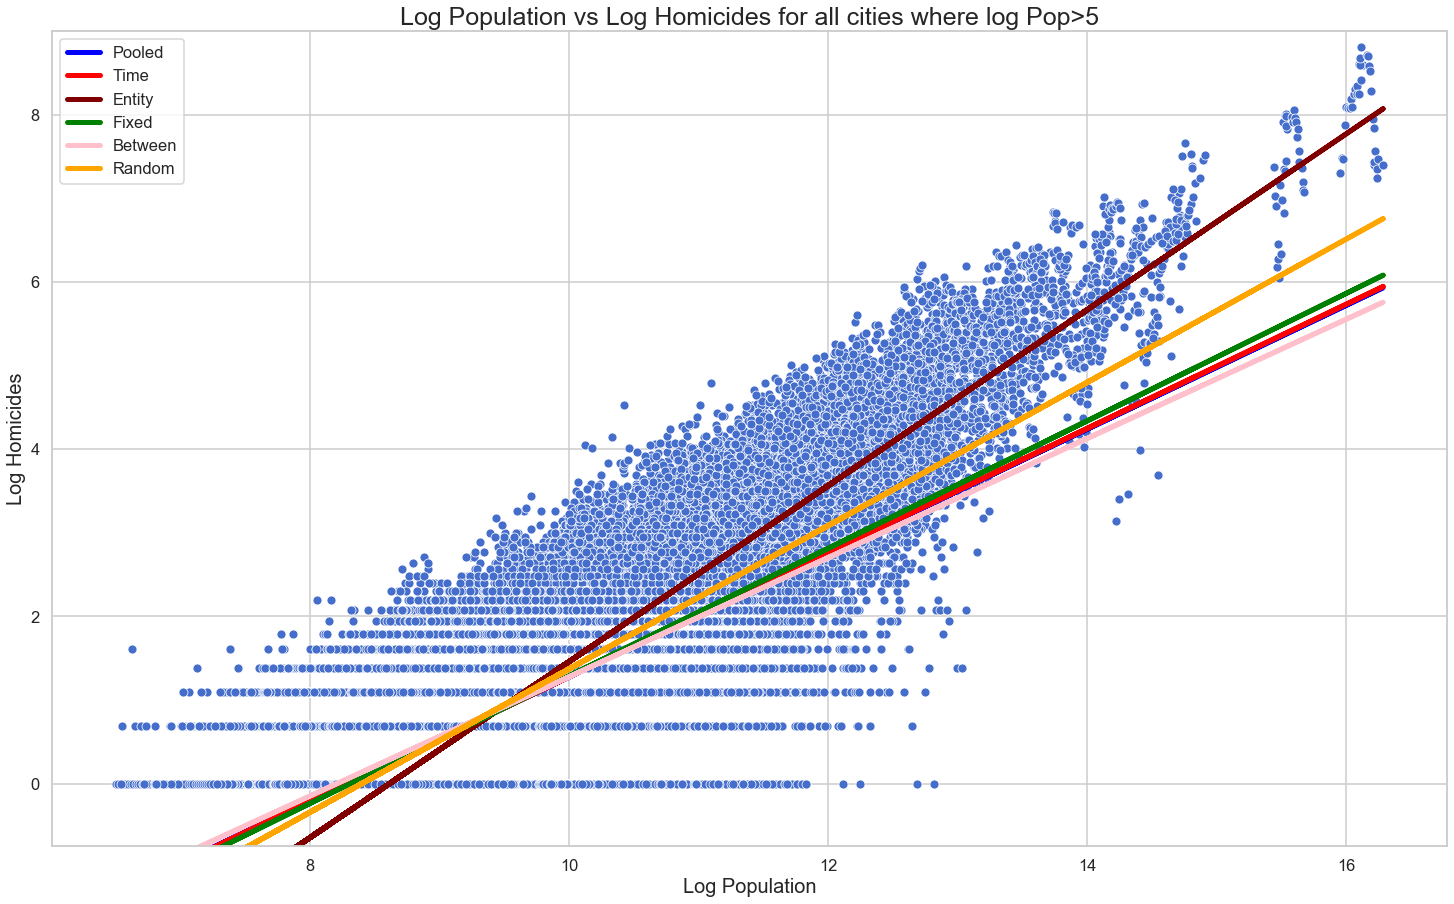

In [76]:
sns.scatterplot(x = 'Population', y = 'Homicides',data = data,color = '#456ECC')

#Plot model curves
plt.plot('Population','y_pooled',data = model_res,color = 'b',linewidth = 5)
plt.plot('Population','y_time',data = model_res,color = 'r',linewidth = 5)
plt.plot('Population','y_entity',data = model_res,color = 'maroon',linewidth = 5)
plt.plot('Population','y_fixed',data = model_res,color = 'green',linewidth = 5)
plt.plot('Population','y_between',data = model_res,color = 'pink',linewidth = 5)
plt.plot('Population','y_random',data = model_res,color = 'orange',linewidth = 5)

plt.title('Log Population vs Log Homicides for all cities where log Pop>5',fontsize = 25)
plt.xlabel('Log Population',fontsize = 20)
plt.ylabel('Log Homicides',fontsize = 20)
plt.legend(['Pooled','Time','Entity','Fixed','Between','Random'])
plt.ylim(-0.75,9)
plt.show()

In [135]:
#Let's observe the distribution of population and homicides for popular Brazilian cities
data_brasilia = data[data.index.get_level_values('CityUF')=='Brasilia, DF']
data_janeiro = data[data.index.get_level_values('CityUF').str.contains('Rio de Janeiro')]
data_salvador = data[data.index.get_level_values('CityUF').str.contains('Salvador, BA')]
data_paulo = data[data.index.get_level_values('CityUF').str.contains('Sao Paulo, SP')]
data_manaus = data[data.index.get_level_values('CityUF').str.contains('Manaus')]
data_horizonte = data[data.index.get_level_values('CityUF').str.contains('Belo Horizonte')]

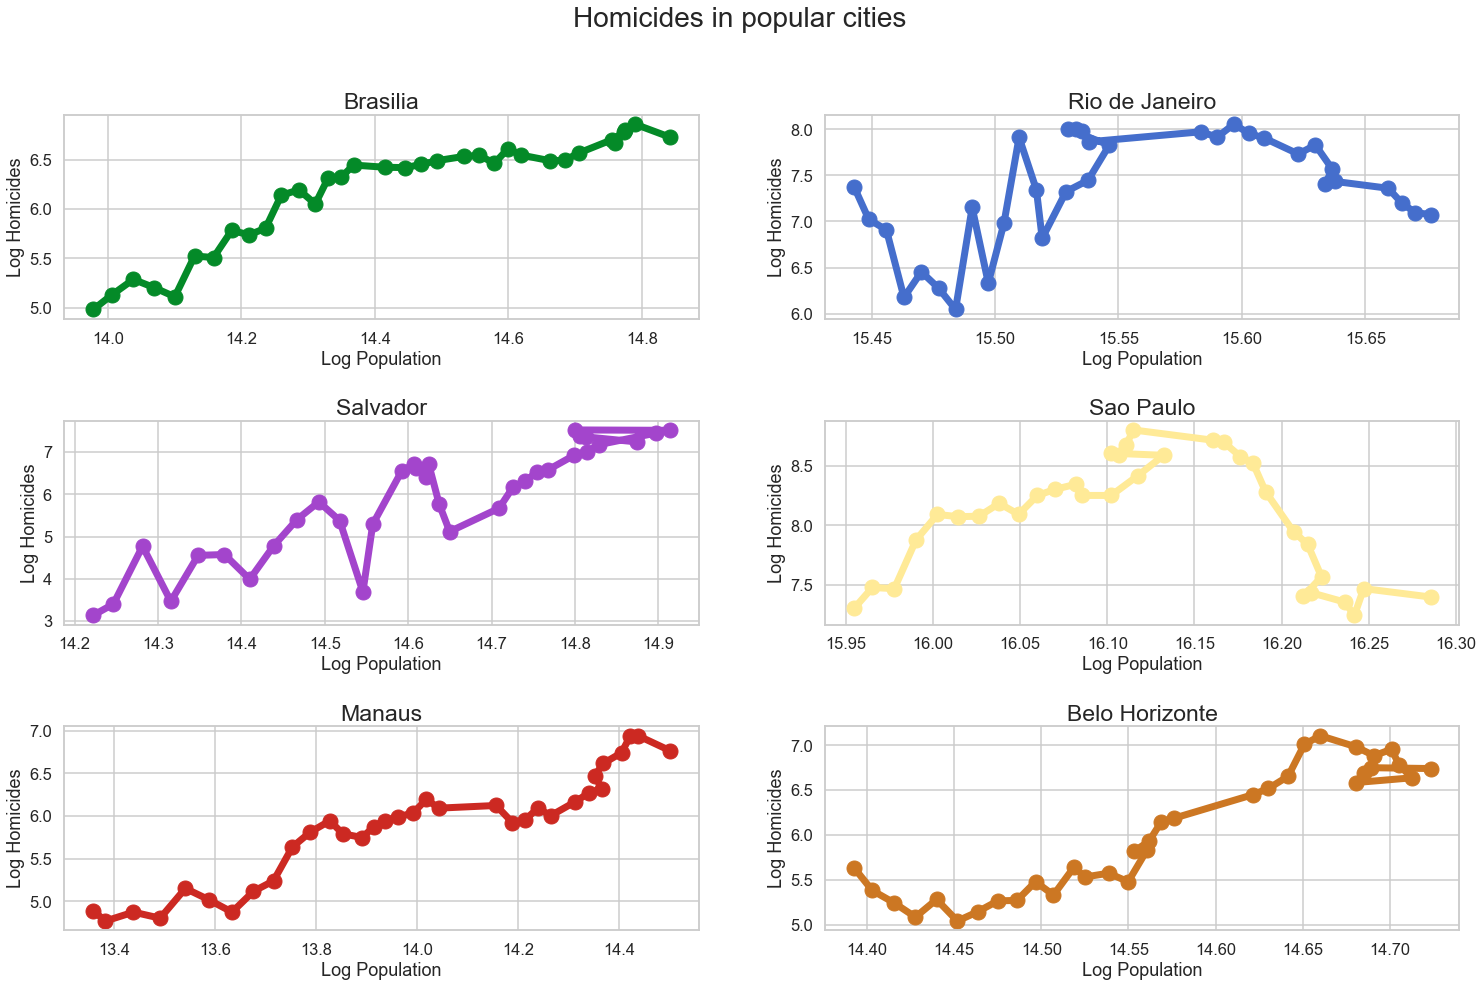

In [159]:
fig,axs = plt.subplots(3,2)

axs[0,0].plot('Population','Homicides',data = data_brasilia,marker = 'o',color = '#048A28',linewidth = 7,markersize = 15)
axs[0,0].set_title('Brasilia',fontsize = 23)
axs[0,1].plot('Population','Homicides',data = data_janeiro,marker = 'o',color = '#456ECC',linewidth = 7,markersize = 15)
axs[0,1].set_title('Rio de Janeiro',fontsize = 23)
axs[1,0].plot('Population','Homicides',data = data_salvador,marker = 'o',color = '#A345CC',linewidth = 7,markersize = 15)
axs[1,0].set_title('Salvador',fontsize = 23)
axs[1,1].plot('Population','Homicides',data = data_paulo,marker = 'o',color = '#FFEA97',linewidth = 7,markersize = 15)
axs[1,1].set_title('Sao Paulo',fontsize = 23)
axs[2,0].plot('Population','Homicides',data = data_manaus,marker = 'o',color = '#CC2922',linewidth = 7,markersize = 15)
axs[2,0].set_title('Manaus',fontsize = 23)
axs[2,1].plot('Population','Homicides',data = data_horizonte,marker = 'o',color = '#CC7723',linewidth = 7,markersize = 15)
axs[2,1].set_title('Belo Horizonte',fontsize = 23)

#Set x-label and y label for all axis 
for ax in axs.flat:
    ax.set(xlabel='Log Population', ylabel='Log Homicides')
    
#Add space in between plots to avoid overlap
fig.subplots_adjust(hspace=.5)   

#Add super title
fig.suptitle('Homicides in popular cities',fontsize = 28)

plt.show()

In [66]:
#Plot model parameters
model_params = pd.DataFrame({'parameters':[res.params[1],res_timeeffects.params[1],res_entityeffects.params[1],
              res_fixedeffects.params[1],be_res.params[1],re_res.params[1],fd_res.params[0]],
                           'models':['pooled','time','entity','time-entity','between','random','firstdifference']})

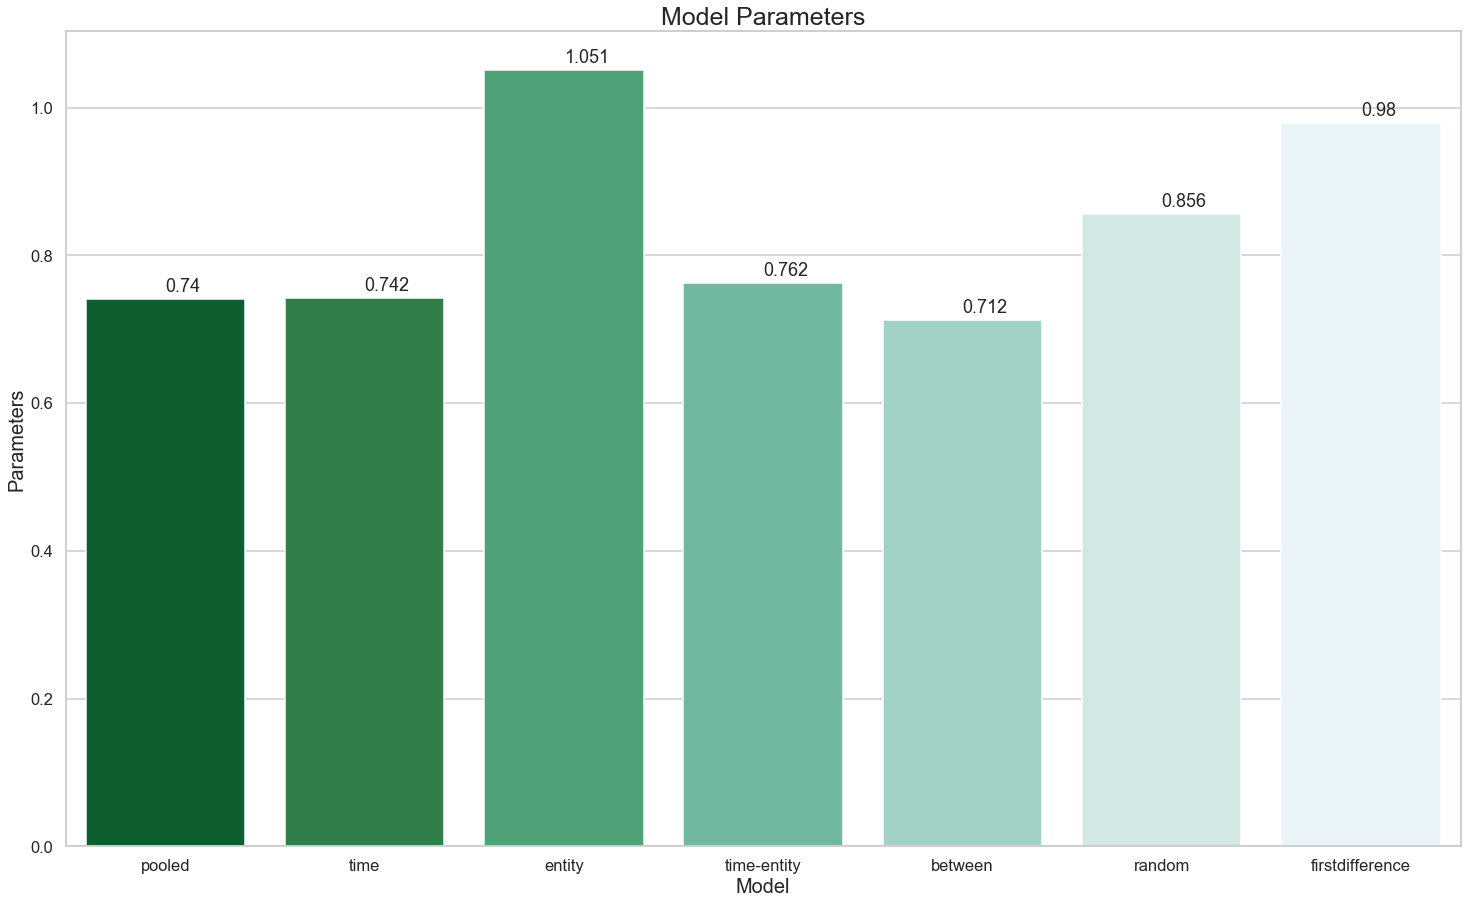

In [67]:
sns.barplot(x='models',y='parameters',data=model_params,palette='BuGn_r')
plt.title("Model Parameters",fontsize=25)
plt.xlabel('Model',fontsize = 20)
plt.ylabel('Parameters',fontsize =20)
for i,p in enumerate(model_params['parameters']):
    plt.text(i,p+0.01,round(p,3))
plt.show()

In [68]:
#Plot model r-squared
model_scores = pd.DataFrame({'rsquared':[res.rsquared,res_timeeffects.rsquared,res_entityeffects.rsquared,
              res_fixedeffects.rsquared,be_res.rsquared,re_res.rsquared,fd_res.rsquared],
                           'models':['pooled','time','entity','time-entity','between','random','firstdifference']})

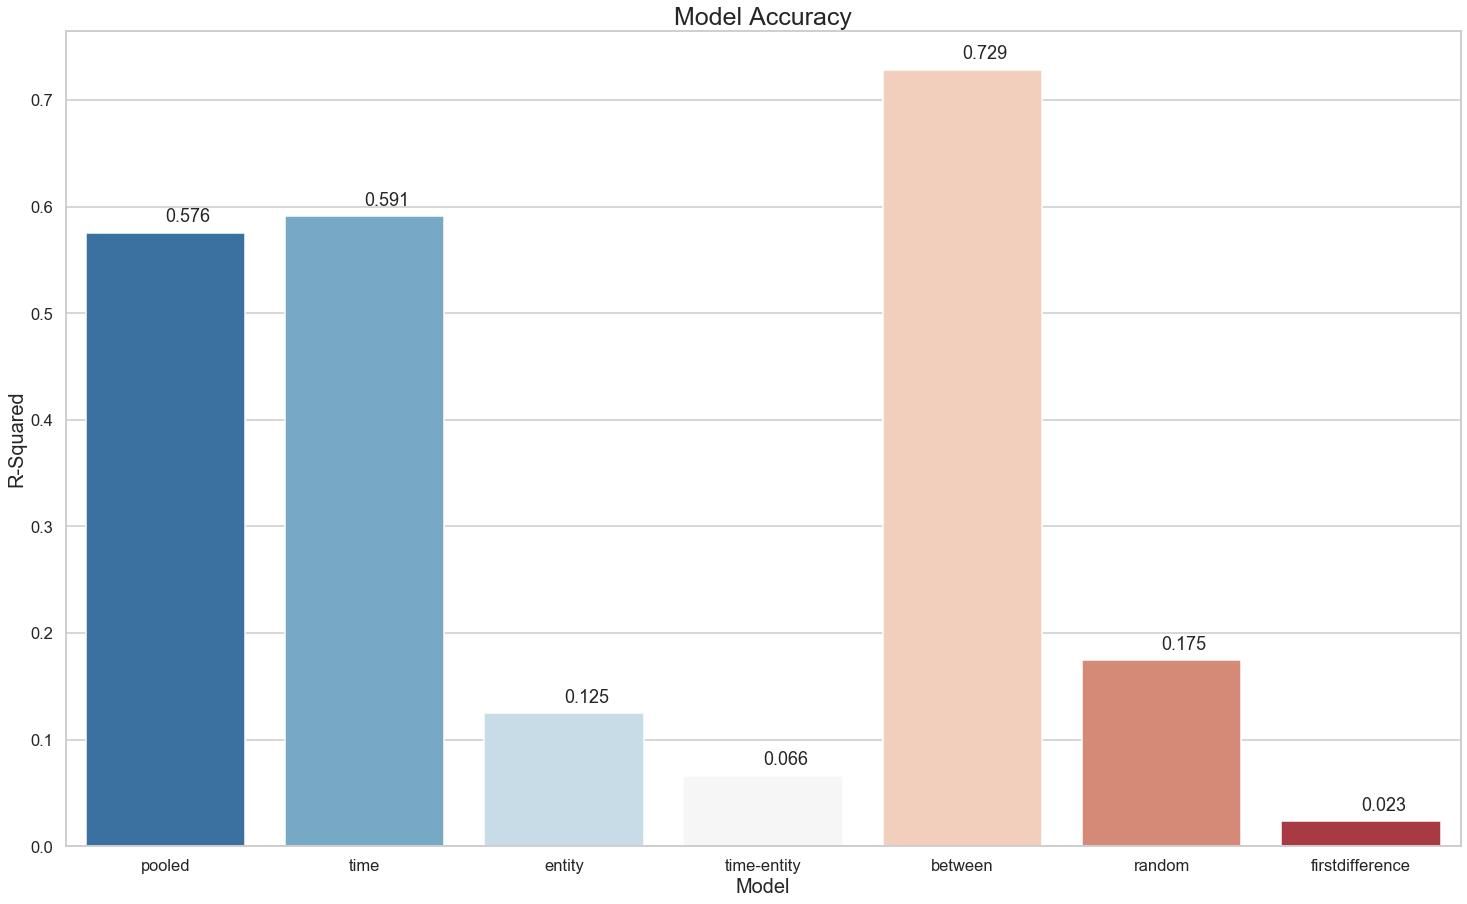

In [69]:
sns.barplot(x='models',y='rsquared',data=model_scores,palette='RdBu_r')
plt.title("Model Accuracy",fontsize=25)
plt.xlabel('Model',fontsize = 20)
plt.ylabel('R-Squared',fontsize =20)
for i,p in enumerate(model_scores['rsquared']):
    plt.text(i,p+0.01,round(p,3))
plt.show()